In [13]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('asthma_disease_data.csv')

In [4]:
print(df.shape)
print(df['Diagnosis'].value_counts())   
X = df.drop(columns=['Diagnosis','DoctorInCharge'], axis=1)
y = df['Diagnosis']

(2392, 29)
Diagnosis
0    2268
1     124
Name: count, dtype: int64


In [5]:
# print(X.columns)
# print(y.shape)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(X_res.shape)
print(y_res.shape)
print(y_res.value_counts())


(4536, 27)
(4536,)
Diagnosis
0    2268
1    2268
Name: count, dtype: int64


In [6]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def scores(y_test, pred):
    print("Accuracy: ",accuracy_score(y_test, pred))
    print("Precision: ",precision_score(y_test, pred))
    print("Recall: ",recall_score(y_test, pred))
    print("F1 Score: ",f1_score(y_test, pred))
    print("ROC AUC Score: ",roc_auc_score(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()


Accuracy:  0.9768722466960352
Precision:  0.9615384615384616
Recall:  0.9906759906759907
F1 Score:  0.9758897818599311
ROC AUC Score:  0.9775926926240077
[[462  17]
 [  4 425]]


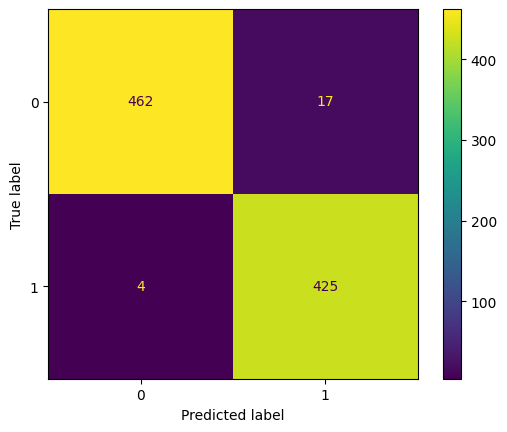

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
clf=RandomForestClassifier(random_state=20)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
# print(pred.shape)
scores(y_test, pred)

Accuracy:  0.9779735682819384
Precision:  0.9766899766899767
Recall:  0.9766899766899767
F1 Score:  0.9766899766899767
ROC AUC Score:  0.9779065749838193
[[469  10]
 [ 10 419]]


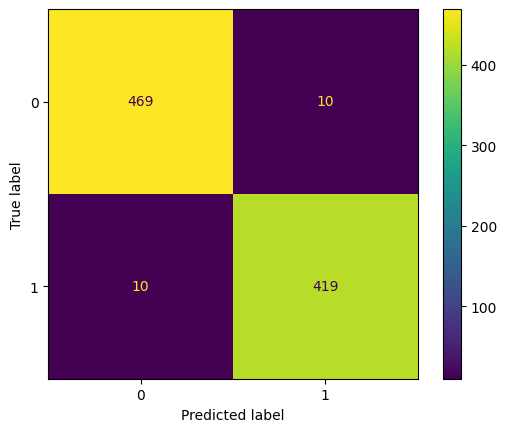

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=20)
model.fit(X_train,y_train)
pred=model.predict(X_test)
scores(y_test, pred)


Accuracy:  0.8370044052863436
Precision:  0.7885010266940452
Recall:  0.8951048951048951
F1 Score:  0.8384279475982532
ROC AUC Score:  0.8400367899324057
[[376 103]
 [ 45 384]]


c:\Users\Samridh Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


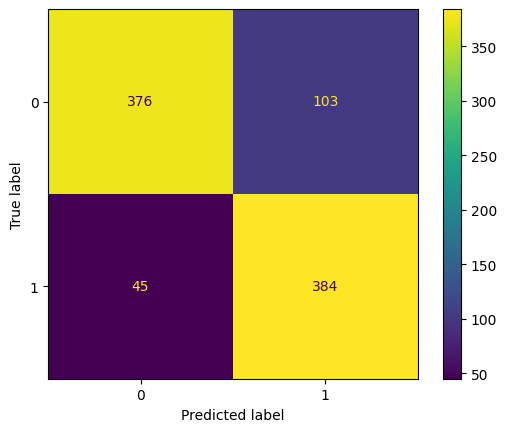

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
scores(y_test, pred)

Accuracy:  0.9372246696035242
Precision:  0.8827160493827161
Recall:  1.0
F1 Score:  0.9377049180327869
ROC AUC Score:  0.940501043841336
[[422  57]
 [  0 429]]


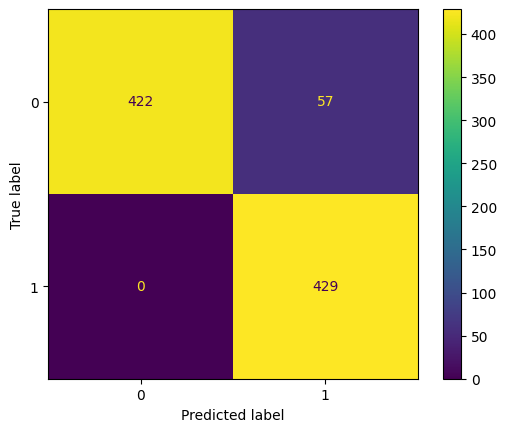

In [11]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
scores(y_test, pred)